Parameters: [[  4   2 -13]]


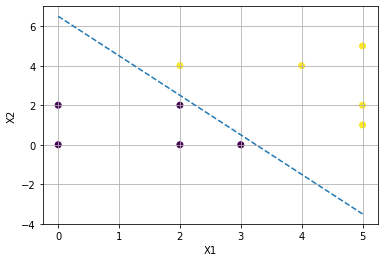

In [23]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

# Create a default RNG numpy generator
rng = default_rng()

# Data points / Coordinates
x : np.ndarray = np.array([
    [0, 0],
    [2, 0],
    [3, 0],
    [0, 2],
    [2, 2],
    [5, 1],
    [5, 2],
    [2, 4],
    [4, 4],
    [5, 5]
])

# Data labels
y : np.ndarray = np.array([[-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]]).T

# Parameters
# (Parameters + bias)
theta : np.ndarray = np.array([[0, 0, 0]])

# Epochs
epochs : int = 100

for t in range(epochs):

    # Generate an array of indices that go from 0 to the number
    # of data points. We shuffle those indices to get a random order
    # for the data points each time.
    indices : np.ndarray = np.arange(len(x))
    rng.shuffle(indices)

    for i in indices:

        x_i = x[i, :]
        y_i = y[i]

        # Append a 1 at the end of Xi to make the bias operation be
        # already included in the dot product
        x_i = np.append(x_i, 1)

        # Get the prediction for the "ith" datapoint
        y_pred = np.dot(theta, x_i)

        # If the real Y and predicted Y are different (Their product is negative)
        # y = -1 | pred = -1 | out = 1
        # y = -1 | pred = +1 | out = -1
        # y = +1 | pred = -1 | out = -1
        # y = +1 | pred = +1 | out = 1
        if y_i * y_pred <= 0:

            # Theta is updated
            theta = theta + y_i * x_i

# Print the parameters
print("Parameters:", theta)

# Boundary
x_line = np.linspace(0, 5, 30)
y_line = (theta[0, 0] * x_line + theta[0, 2]) / -theta[0, 1]
plt.plot(x_line, y_line, '--', label='Classifier')

# Plot the points to classify
plt.scatter(x[:, 0], x[:, 1], c = y[:,0])

# Plot settings
plt.xlabel("X1")
plt.ylabel("X2")
# plt.legend(loc='best')
plt.grid()
plt.show()